In [2]:
BoliviaMapsLink="https://github.com/FabianRomero20/geodfprepro1.2/raw/main/maps/BoliviaMaps_32719.gpkg"

from  fiona import listlayers


#layers in maps
listlayers(BoliviaMapsLink)

['departments',
 'cities',
 'rivers',
 'border',
 'provincias',
 'municipios',
 'airports']

In [4]:
# reading in the data:

import os
os.environ['USE_PYGEOS'] = '0'

import geopandas as gpd

departments=gpd.read_file(BoliviaMapsLink,layer='departments')
provincias=gpd.read_file(BoliviaMapsLink,layer='provincias')
municipios=gpd.read_file(BoliviaMapsLink,layer='municipios')
cities=gpd.read_file(BoliviaMapsLink,layer='cities')
airports=gpd.read_file(BoliviaMapsLink,layer='airports')
rivers=gpd.read_file(BoliviaMapsLink,layer='rivers')
border=gpd.read_file(BoliviaMapsLink,layer='border')

In [5]:
import pandas as pd 
infoseaports=pd.read_csv(os.path.join("data","UpdatedPub150.csv"))

#columns available (so many)
infoseaports.columns.to_list()

['World Port Index Number',
 'Region Name',
 'Main Port Name',
 'Alternate Port Name',
 'UN/LOCODE',
 'Country Code',
 'World Water Body',
 'IHO S-130 Sea Area',
 'Sailing Direction or Publication',
 'Publication Link',
 'Standard Nautical Chart',
 'IHO S-57 Electronic Navigational Chart',
 'IHO S-101 Electronic Navigational Chart',
 'Digital Nautical Chart',
 'Tidal Range (m)',
 'Entrance Width (m)',
 'Channel Depth (m)',
 'Anchorage Depth (m)',
 'Cargo Pier Depth (m)',
 'Oil Terminal Depth (m)',
 'Liquified Natural Gas Terminal Depth (m)',
 'Maximum Vessel Length (m)',
 'Maximum Vessel Beam (m)',
 'Maximum Vessel Draft (m)',
 'Offshore Maximum Vessel Length (m)',
 'Offshore Maximum Vessel Beam (m)',
 'Offshore Maximum Vessel Draft (m)',
 'Harbor Size',
 'Harbor Type',
 'Harbor Use',
 'Shelter Afforded',
 'Entrance Restriction - Tide',
 'Entrance Restriction - Heavy Swell',
 'Entrance Restriction - Ice',
 'Entrance Restriction - Other',
 'Overhead Limits',
 'Underkeel Clearance Manage

In [6]:
infoseaports.rename(columns={'Main Port Name':'portName'},inplace=True)
infoseaports=infoseaports.loc[:,['portName', 'Country Code','Latitude', 'Longitude']]
infoseaports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3774 entries, 0 to 3773
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   portName      3774 non-null   object 
 1   Country Code  3774 non-null   object 
 2   Latitude      3774 non-null   float64
 3   Longitude     3774 non-null   float64
dtypes: float64(2), object(2)
memory usage: 118.1+ KB


In [7]:
seaports=gpd.GeoDataFrame(data=infoseaports.copy(),
                 geometry=gpd.points_from_xy(infoseaports.Longitude,
                                             infoseaports.Latitude), 
                 crs=4326)# notice it is unprojected

seaports_bol=seaports[seaports['Country Code']=='Bolivia'].copy()

seaports_bol.reset_index(drop=True, inplace=True)

seaports_bol_32719=seaports_bol.to_crs(32719) # projected crs

C:\Users\INTEL\anaconda3\lib\site-packages\geopandas\plotting.py:695: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


<Axes: >

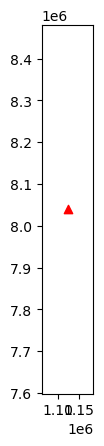

In [8]:
# subsetting
largeAirports=airports[airports.kind=='large_airport'] 
largeAirports.reset_index(drop=True, inplace=True)

#plotting
base=largeAirports.plot(color='red',marker="^")
seaports_bol_32719.plot(ax=base,alpha=0.5,markersize=3)